# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* строить простую предсказательную модель


* (бонус) конструировать новые признаки

Основы matplotlib: https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [79]:
Data = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/Smartphone_activity_analysis/main/Titanic.csv",
                   sep=",")

**Задание 1.** Выведите на экран размеры таблицы

In [6]:
#your code here
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [7]:
#your code here
Data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
Data.describe(include='object')

Name   Sex  Ticket Cabin Embarked
count                           891   891     891   204      889
unique                          891     3     681   147        3
top     Giles; Mr. Frederick Edward  male  347082    G6        S
freq                              1   574       7     4      644

In [9]:
Data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0      1   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen; Miss. Laina  female  26.0      0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen; Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [19]:
Data[Data['Sex'].isna()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [10]:
Data['Sex'].value_counts()
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [12]:
set(Data["Sex"])

{'female', 'male', 'unknown'}

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [14]:
Data = Data[Data.Sex != 'unknown']
Data.Sex.value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [15]:
Data.Sex = Data.Sex.apply(lambda x: 1 if x=='male' else 0)
Data.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 886, dtype: int64

Посмотрим, как влияет пол на выживаемость.

In [ ]:
Data.head()

In [ ]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

In [ ]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

In [ ]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [ ]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [17]:
Data[Data['Embarked'].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard; Miss. Amelie   
829          830         1       1  Stone; Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61     0  38.0      0      0  113572  80.0   B28      NaN  
829    0  62.0      0      0  113572  80.0   B28      NaN

In [18]:
Data[~Data['Embarked'].isna()]

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund; Mr. Owen Harris    1  22.0      1   
1    Cumings; Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen; Miss. Laina    0  26.0      0   
3         Futrelle; Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen; Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila; Rev. Juozas    1  27.0      0   
887                       Graham; Miss. Margaret Edith    0  19.0      0   
888           Johnston; Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr; Mr. Karl Howell    1  26.0      0   
890                                Dooley; Mr. Patrick    1  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[884 rows x 12 columns]

In [ ]:
Data = Data[~Data['Embarked'].isna()]

In [20]:
Data.shape

(886, 12)

**Задание 7.** Удалите из таблицы Data столбец Embarked.

In [ ]:
Data.drop(['Embarked'], axis = 1, inplace = True)

In [ ]:
Data.head()

**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [29]:
Data[Data['Age'].isna()==True]#.count()

PassengerId  Survived  Pclass  \
17            18         1       2   
19            20         1       3   
26            27         0       3   
29            30         0       3   
31            32         1       1   
..           ...       ...     ...   
859          860         0       3   
863          864         0       3   
868          869         0       3   
878          879         0       3   
888          889         0       3   

                                               Name  Sex  Age  SibSp  Parch  \
17                     Williams; Mr. Charles Eugene    1  NaN      0      0   
19                          Masselmani; Mrs. Fatima    0  NaN      0      0   
26                          Emir; Mr. Farred Chehab    1  NaN      0      0   
29                              Todoroff; Mr. Lalio    1  NaN      0      0   
31   Spencer; Mrs. William Augustus (Marie Eugenie)    0  NaN      1      0   
..                                              ...  ...  ...    ...    ...   
859                                Razi; Mr. Raihed    1  NaN      0      0   
863               Sage; Miss. Dorothy Edith "Dolly"    0  NaN      8      2   
868                     van Melkebeke; Mr. Philemon    1  NaN      0      0   
878                              Laleff; Mr. Kristo    1  NaN      0      0   
888        Johnston; Miss. Catherine Helen "Carrie"    0  NaN      1      2   

         Ticket      Fare Cabin Embarked  
17       244373   13.0000   NaN        S  
19         2649    7.2250   NaN        C  
26         2631    7.2250   NaN        C  
29       349216    7.8958   NaN        S  
31     PC 17569  146.5208   B78        C  
..          ...       ...   ...      ...  
859        2629    7.2292   NaN        C  
863    CA. 2343   69.5500   NaN        S  
868      345777    9.5000   NaN        S  
878      349217    7.8958   NaN        S  
888  W./C. 6607   23.4500   NaN        S  

[175 rows x 12 columns]

In [26]:
Data[Data['Age'].isna()].count()

PassengerId    175
Survived       175
Pclass         175
Name           175
Sex            175
Age              0
SibSp          175
Parch          175
Ticket         175
Fare           175
Cabin           19
Embarked       175
dtype: int64

Заполним пропуски медианным значением Age.

In [31]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


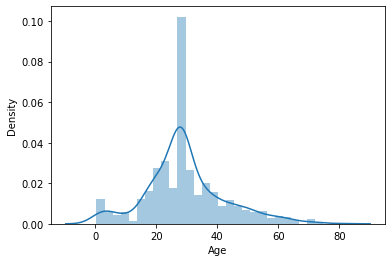

In [32]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

In [73]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


**Обработаем признак 'Fare'**

1) Проверим, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполним их медианным значением Fare

In [ ]:
Data['Fare'].value_counts()

**Обработаем признак 'Pclass'**

In [34]:
Data['Pclass'].value_counts()

3    487
1    216
2    183
Name: Pclass, dtype: int64

In [33]:
Data['Pclass'].isna().sum()

0

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


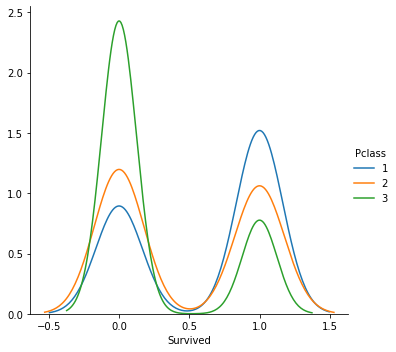

In [40]:

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Survived")
facet.add_legend();

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=Data)
plt.title('Pclass - Survived')
plt.show()

Столбец PassengerId является категориальным и не несёт важной информации, удалим его.

In [41]:
Data.drop('PassengerId',axis=1, inplace=True)

In [42]:
Data.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund; Mr. Owen Harris    1   
1         1       1  Cumings; Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen; Miss. Laina    0   
3         1       1       Futrelle; Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen; Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked        AgeBin  \
0  22.0      1      0         A/5 21171   7.2500   NaN        S  (16.0, 32.0]   
1  38.0      1      0          PC 17599  71.2833   C85        C  (32.0, 48.0]   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  (16.0, 32.0]   
3  35.0      1      0            113803  53.1000  C123        S  (32.0, 48.0]   
4  35.0      0      0            373450   8.0500   NaN        S  (32.0, 48.0]   

   AgeBin_Code  
0            1  
1            2  
2            1  
3            2  
4            2

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

Создадим таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [35]:
NumericData = Data._get_numeric_data()
NumericData.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    1  22.0      1      0   7.2500
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
4            5         0       3    1  35.0      0      0   8.0500

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

Посмотрим на попарные зависимости некоторых признаков.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


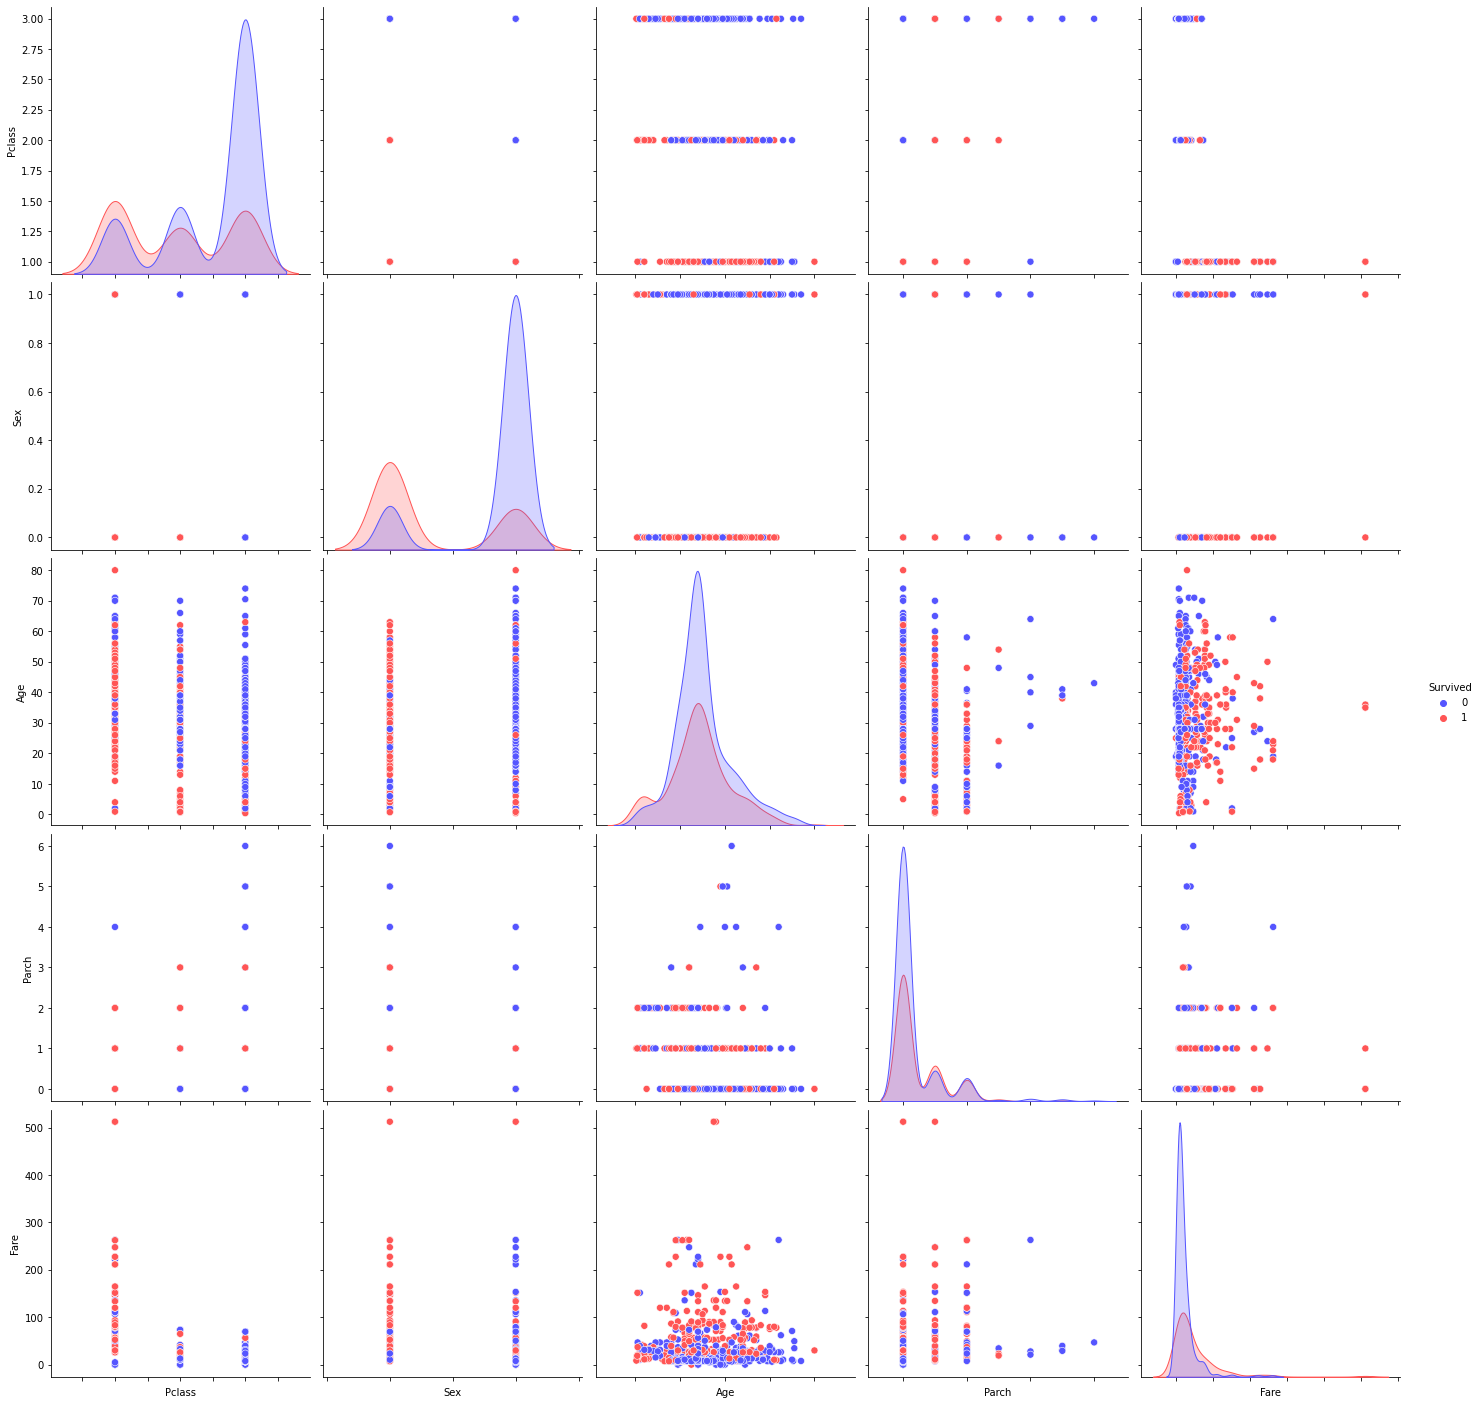

In [37]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

### Получение простого предсказания.

Мы видим, что больше всего влияют на выживаемость пол и класс:
* женщины, как правило, выживали
* мужчины - нет

In [ ]:
def first_prediction(x):
    if x.Sex == 0:
        return 1
    return 0

In [ ]:
Data['prediction'] = Data.apply(lambda x: first_prediction(x), axis=1)
Data[['Survived','prediction']]

Посмотрим на качество нашего предсказания.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Data['Survived'], Data['prediction'])

## Бонусная часть - самостоятельное задание.

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [38]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder. Полученные метки уже можно использовать как числовые признаки.

In [39]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

Age        AgeBin  AgeBin_Code
0  22.0  (16.0, 32.0]            1
1  38.0  (32.0, 48.0]            2
2  26.0  (16.0, 32.0]            1
3  35.0  (32.0, 48.0]            2
4  35.0  (32.0, 48.0]            2

**Задание 9.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [49]:
#your code here
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)

Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])
print(Data[Data['FareBin_Code']==0].count())
print(Data[Data['FareBin_Code']==1].count())
print(Data[Data['FareBin_Code']==2].count())
print(Data[Data['FareBin_Code']==3].count())

Survived        848
Pclass          848
Name            848
Sex             848
Age             848
SibSp           848
Parch           848
Ticket          848
Fare            848
Cabin           174
Embarked        846
AgeBin          848
AgeBin_Code     848
FareBin         848
FareBin_Code    848
dtype: int64
Survived        29
Pclass          29
Name            29
Sex             29
Age             29
SibSp           29
Parch           29
Ticket          29
Fare            29
Cabin           22
Embarked        29
AgeBin          29
AgeBin_Code     29
FareBin         29
FareBin_Code    29
dtype: int64
Survived        6
Pclass          6
Name            6
Sex             6
Age             6
SibSp           6
Parch           6
Ticket          6
Fare            6
Cabin           6
Embarked        6
AgeBin          6
AgeBin_Code     6
FareBin         6
FareBin_Code    6
dtype: int64
Survived        3
Pclass          3
Name            3
Sex             3
Age             3
SibSp           

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 10.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [57]:
#your code here
Data['NameLen'] = Data.Name.apply(lambda x: len(x))
Data[['Name','NameLen']]

Name  NameLen
0                              Braund; Mr. Owen Harris       23
1    Cumings; Mrs. John Bradley (Florence Briggs Th...       51
2                               Heikkinen; Miss. Laina       22
3         Futrelle; Mrs. Jacques Heath (Lily May Peel)       44
4                             Allen; Mr. William Henry       24
..                                                 ...      ...
886                              Montvila; Rev. Juozas       21
887                       Graham; Miss. Margaret Edith       28
888           Johnston; Miss. Catherine Helen "Carrie"       40
889                              Behr; Mr. Karl Howell       21
890                                Dooley; Mr. Patrick       19

[886 rows x 2 columns]

In [69]:
Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1
Data.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund; Mr. Owen Harris    1   
1         1       1  Cumings; Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen; Miss. Laina    0   
3         1       1       Futrelle; Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen; Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked        AgeBin  \
0  22.0      1      0         A/5 21171   7.2500   NaN        S  (16.0, 32.0]   
1  38.0      1      0          PC 17599  71.2833   C85        C  (32.0, 48.0]   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  (16.0, 32.0]   
3  35.0      1      0            113803  53.1000  C123        S  (32.0, 48.0]   
4  35.0      0      0            373450   8.0500   NaN        S  (32.0, 48.0]   

   AgeBin_Code          FareBin  FareBin_Code  NameLen  FamilySize  
0            1  (-0.512, 128.0]             0       23           2  
1            2  (-0.512, 128.0]             0       51           2  
2            1  (-0.512, 128.0]             0       22           1  
3            2  (-0.512, 128.0]             0       44           2  
4            2  (-0.512, 128.0]             0       24           1

**Задание 11**. Выведите на экран визуализации, отражающие влияние новых созданных признаков на целевую переменную (Survived). Тип визуализации остается на ваше усмотрение.

In [76]:
correlations_data = Data.corr()['Survived'].sort_values()
correlations_data

Sex            -0.545547
Pclass         -0.338447
Age            -0.062245
AgeBin_Code    -0.041787
SibSp          -0.033743
FamilySize      0.018997
Parch           0.085753
FareBin_Code    0.147939
Fare            0.258216
NameLen         0.334347
Survived        1.000000
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'Correlation of New Features'}>

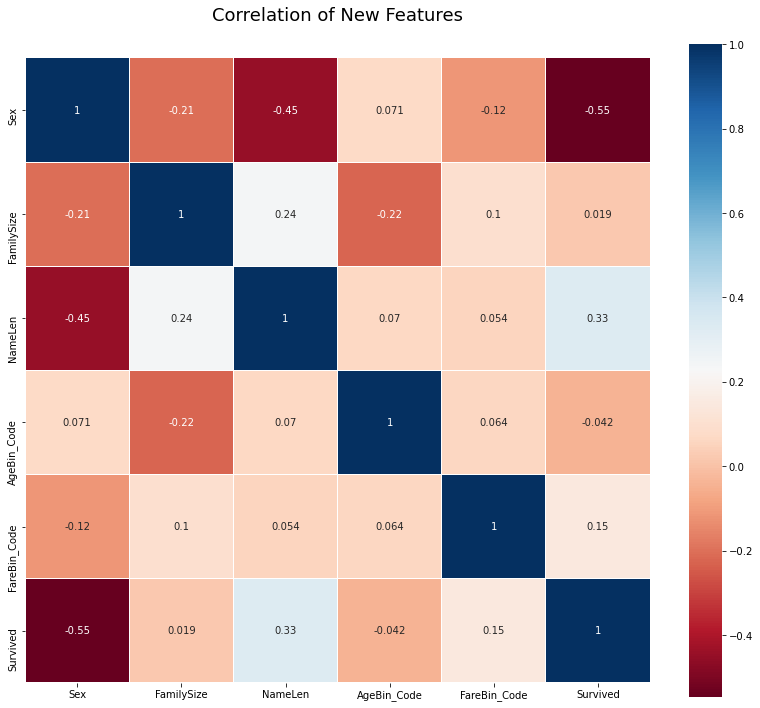

In [77]:
#your code here
NewFeatureData = Data[['Sex','FamilySize', 'NameLen', 'AgeBin_Code','FareBin_Code', 'Survived']]._get_numeric_data()
NewFeatureData.head()
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Correlation of New Features', y=1.05, size=18)
sns.heatmap(NewFeatureData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Задание 12.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [72]:
#your code here
NewFeatureData = Data[['FamilySize', 'NameLen', 'AgeBin_Code','FareBin_Code', 'Survived']]._get_numeric_data()
NewFeatureData.head()
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Correlation of New Features', y=1.05, size=18)
sns.heatmap(NewFeatureData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Correlation of New Features'}>

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 13*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью. Визуализируйте влияние новых признаков на целевую переменную.

In [ ]:
#your code here

**Задание 14.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [ ]:
#your answer here

**Задание 15.** Попробуйте улучшить предсказание нашей модели, используя, кроме признаков Sex и Pclass другие признаки.

In [ ]:
#your answer here